<a href="https://colab.research.google.com/github/gongx030/seatac_manuscript/blob/main/Vplots_for_and_EBs_specific_genes.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Compare MACS2 and SeATAC for detecting differential V-plots of ATAC-seq data between EBs and Flk1+ EBs at day2.5 post Etv2 induction 

This task runs on SeATAC `v0.4.0`

In [ ]:
start_time <- Sys.time()

### Install external packages

In [ ]:
system('apt-get -q install libgsl-dev', intern = TRUE)

[1] "Reading package lists..."                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                      
 [2] "Building dependency tree..."                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                   
 [3] "Reading state information..."                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                  
 [4] "The following additional packages will be installed:"                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                          
 [5] "  libgsl23 libgslcblas0"                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                       
 [6] "Suggested packages:"                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                           
 [7] "  gsl-ref-psdoc | gsl-doc-pdf | gsl-doc-info | gsl-ref-html"                                                           

In [ ]:
system('apt-get install libcairo2-dev', intern = TRUE) # for Cairo package that is required by ComplexHeatmap package

[1] "Reading package lists..."                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                      
 [2] "Building dependency tree..."                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                   
 [3] "Reading state information..."                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                  
 [4] "The following additional packages will be installed:"                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                          
 [5] "  libcairo-script-interpreter2 libpixman-1-dev libxcb-shm0-dev"                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                
 [6] "Suggested packages:"                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                           
 [7] "  libcairo2-doc"                                                                                                       

### Install R packages from CRAN

In [ ]:
install.packages('BiocManager')

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)



In [ ]:
required_packages <- c(
  "GenomicAlignments",
  'BSgenome.Mmusculus.UCSC.mm10',
  'motifmatchr',
  'uwot',
  'igraph',
  'VennDiagram',
  'patchwork'
 )

In [ ]:
missing_packages <- required_packages[!required_packages %in% rownames(installed.packages())]
if (length(missing_packages) > 0){
    BiocManager::install(missing_packages)
}

'getOption("repos")' replaces Bioconductor standard repositories, see
'?repositories' for details

replacement repositories:
    CRAN: https://cran.rstudio.com


Bioconductor version 3.14 (BiocManager 1.30.16), R 4.1.3 (2022-03-10)

Installing package(s) 'BiocVersion', 'GenomicAlignments',
  'BSgenome.Mmusculus.UCSC.mm10', 'motifmatchr', 'uwot', 'igraph',
  'VennDiagram', 'patchwork'

also installing the dependencies ‘rjson’, ‘plyr’, ‘pracma’, ‘AnnotationDbi’, ‘xtable’, ‘R.oo’, ‘R.methodsS3’, ‘png’, ‘BiocIO’, ‘restfulr’, ‘reshape2’, ‘poweRlaw’, ‘annotate’, ‘GO.db’, ‘R.utils’, ‘KEGGREST’, ‘plogr’, ‘formatR’, ‘RCurl’, ‘GenomeInfoDbData’, ‘XVector’, ‘MatrixGenerics’, ‘Biobase’, ‘DelayedArray’, ‘zlibbioc’, ‘bitops’, ‘Rhtslib’, ‘snow’, ‘BH’, ‘rtracklayer’, ‘matrixStats’, ‘caTools’, ‘CNEr’, ‘DirichletMultinomial’, ‘gtools’, ‘RSQLite’, ‘seqLogo’, ‘TFMPvalue’, ‘XML’, ‘RcppEigen’, ‘sitmo’, ‘lambda.r’, ‘futile.options’, ‘BiocGenerics’, ‘S4Vectors’, ‘IRanges’, ‘GenomeInfoDb’, ‘GenomicRanges’, ‘Su

In [ ]:
library(devtools)

Loading required package: usethis



### Install R packages from github

In [ ]:
install_github("GreenleafLab/chromVARmotifs")

crayon       (1.5.0 -> 1.5.1) [CRAN]
vctrs        (0.3.8 -> 0.4.0) [CRAN]
fansi        (1.0.2 -> 1.0.3) [CRAN]
magrittr     (2.0.2 -> 2.0.3) [CRAN]
RColorBrewer (1.1-2 -> 1.1-3) [CRAN]
tzdb         (0.2.0 -> 0.3.0) [CRAN]


Installing 6 packages: crayon, vctrs, fansi, magrittr, RColorBrewer, tzdb

Installing packages into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)



* checking for file ‘/tmp/RtmpGVOZEY/remotes63267a654e/GreenleafLab-chromVARmotifs-38bed55/DESCRIPTION’ ... OK
* preparing ‘chromVARmotifs’:
* checking DESCRIPTION meta-information ... OK
* checking for LF line-endings in source and make files and shell scripts
* checking for empty or unneeded directories
* building ‘chromVARmotifs_0.2.0.tar.gz’



Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)



### Install `seatac` from github

In [ ]:
install_github('gongx030/seatac', quiet = FALSE, ref = 'v0.4.0') # install from the branch v0.4.0
devtools::reload(pkgload::inst("seatac"))
library(seatac)

rprojroot    (2.0.2 -> 2.0.3 ) [CRAN]
tfautograph  (NA    -> 0.3.2 ) [CRAN]
processx     (3.5.2 -> 3.5.3 ) [CRAN]
config       (NA    -> 0.3.1 ) [CRAN]
here         (NA    -> 1.0.1 ) [CRAN]
RcppTOML     (NA    -> 0.1.7 ) [CRAN]
zeallot      (NA    -> 0.1.0 ) [CRAN]
tfruns       (NA    -> 1.5.0 ) [CRAN]
tensorflow   (NA    -> 2.8.0 ) [CRAN]
reticulate   (NA    -> 1.24  ) [CRAN]
keras        (NA    -> 2.8.0 ) [CRAN]
abind        (NA    -> 1.4-5 ) [CRAN]
gplots       (NA    -> 3.1.1 ) [CRAN]
tfdatasets   (NA    -> 2.7.0 ) [CRAN]
tfprobabi... (NA    -> 0.15.0) [CRAN]


Installing 15 packages: rprojroot, tfautograph, processx, config, here, RcppTOML, zeallot, tfruns, tensorflow, reticulate, keras, abind, gplots, tfdatasets, tfprobability

Installing packages into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)



* checking for file ‘/tmp/RtmpGVOZEY/remotes636969d53f/gongx030-seatac-55f9f36/DESCRIPTION’ ... OK
* preparing ‘seatac’:
* checking DESCRIPTION meta-information ... OK
* checking for LF line-endings in source and make files and shell scripts
* checking for empty or unneeded directories
Omitted ‘LazyData’ from DESCRIPTION
* building ‘seatac_0.4.0-010.tar.gz’



Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

Loading required package: tensorflow

Loading required package: tfprobability

Loading required package: tfdatasets

Loading required package: GenomicRanges

Loading required package: stats4

Loading required package: BiocGenerics


Attaching package: ‘BiocGenerics’


The following objects are masked from ‘package:stats’:

    IQR, mad, sd, var, xtabs


The following objects are masked from ‘package:base’:

    anyDuplicated, append, as.data.frame, basename, cbind, colnames,
    dirname, do.call, duplicated, eval, evalq, Filter, Find, get, grep,
    grepl, intersect, is.unsorted, lapply, Map, mapply, match, mget,
    order, paste, pmax, pmax.int, pmin, pmin.int, Position, rank,
    rbind, Reduce, rownames, sapply, setdiff, sort, table, tapply,
    union, unique, unsplit, which.max, which.min


Loading required package: S4Vectors


Attaching package: ‘S4Vectors’


The following objects are masked from ‘pa

### Load R packages

In [ ]:
library(BSgenome.Mmusculus.UCSC.mm10)
library(dplyr)
library(motifmatchr)
library(chromVARmotifs)
library(igraph)
library(VennDiagram)
library(ggplot2)
library(patchwork)

Loading required package: BSgenome

Loading required package: Biostrings

Loading required package: XVector


Attaching package: ‘Biostrings’


The following object is masked from ‘package:base’:

    strsplit


Loading required package: rtracklayer


Attaching package: ‘dplyr’


The following objects are masked from ‘package:Biostrings’:

    collapse, intersect, setdiff, setequal, union


The following object is masked from ‘package:XVector’:

    slice


The following object is masked from ‘package:Biobase’:

    combine


The following object is masked from ‘package:matrixStats’:

    count


The following objects are masked from ‘package:GenomicRanges’:

    intersect, setdiff, union


The following object is masked from ‘package:GenomeInfoDb’:

    intersect


The following objects are masked from ‘package:IRanges’:

    collapse, desc, intersect, setdiff, slice, union


The following objects are masked from ‘package:S4Vectors’:

    first, intersect, rename, setdiff, setequal, u

### TensorFlow setup

In [ ]:
gpus <- tf$config$list_physical_devices('GPU')
for (gpu in gpus){
  tf$config$experimental$set_memory_growth(gpu, TRUE)
}
logical_gpus <- tf$config$experimental$list_logical_devices('GPU')
sprintf('Physical GPUs: %d', length(gpus)) %>% message()
sprintf('Logical GPUs: %d', length(logical_gpus)) %>% message()

Loaded Tensorflow version 2.8.0

Physical GPUs: 1

Logical GPUs: 1



In [ ]:
Sys.time() - start_time

Time difference of 25.0648 mins

## Parameters

In [ ]:
ARGS <- list(
  bin_size = 5L,
  fragment_size_range_max = 640L,
  fragment_size_interval = 20L,
  window_size = 1000L,
  block_size = 640L,
  sliding_step = 20L,
  min_reads = 10L,

  vae_num_peaks = 5000L,
  vae_latent = c(5L),
  vae_filters0 = c(128L),
  vae_filters = c(32L),
  vae_downsample_layers = 4L,
  vae_upsample_layers = 4L,
  vae_base_learning_rate = c(1e-2),
  vae_epochs = 200L,
  vae_beta_schedule_method = c('constant'),
  vae_beta0 = 1,
  vae_batch_size = c(128L),
  vae_warmup_ratio = 0.1,
  padjusted_cutoff = 0.05,
  log_ratio_cutoff = 0.1,
  center_width = 100L # the center width
)

#EBs

## Load data

In [ ]:
remote_bam_files = c(
 EB_NoDox_D25 = 'https://s3.msi.umn.edu/gongx030/datasets/dataset=Etv2ATAC_version=20190228b/EB_NoDox_D25.bam',
  EB_Dox_D25_Flk1pos = 'https://s3.msi.umn.edu/gongx030/datasets/dataset=Etv2ATAC_version=20190228b/EB_Dox_D25_Flk1pos.bam'
)
for (f in remote_bam_files){
  system(sprintf('wget -cx %s', f))
}
local_bam_files <- gsub('https://', './', remote_bam_files)

In [ ]:
remote_bed_files <- gsub('.bam', '_summits.bed', remote_bam_files)
for (f in remote_bed_files){
  system(sprintf('wget -cx %s', f))
}
local_bed_files <- gsub('https://', './', remote_bed_files)

### Read V-plots

In [ ]:
gr0 <- lapply(local_bed_files, function(bed_file){
  peaks <- read.table(bed_file, header = FALSE, sep = '\t')
  peaks <- GRanges(seqnames = peaks[, 1], range = IRanges(start = peaks[, 2], end = peaks[, 3]))
  peaks <- resize(peaks, fix = 'center', width = 200L)
  peaks
}) %>%
  GRangesList() %>%
  coverage() %>%
  IRanges::slice(lower = 1, rangesOnly = TRUE) %>%
  GRanges() %>%
  resize(fix = 'center', width = ARGS[['window_size']])
gr0 <- gr0[!seqnames(gr0) %in% c('chrM', 'chrY')]
gr <- slidingWindows(gr0, width = ARGS[['block_size']], step = ARGS[['sliding_step']]) %>% unlist()
set.seed(1L); gr <- sample(gr, ARGS[['vae_num_peaks']])
counts <- count_reads(gr, local_bam_files, genome = BSgenome.Mmusculus.UCSC.mm10,  fragment_size_range = c(0, ARGS[['fragment_size_range_max']]))

validate_bam | indexing bam files: ./s3.msi.umn.edu/gongx030/datasets/dataset=Etv2ATAC_version=20190228b/EB_NoDox_D25.bam

read_bam | reading ./s3.msi.umn.edu/gongx030/datasets/dataset=Etv2ATAC_version=20190228b/EB_NoDox_D25.bam

validate_bam | indexing bam files: ./s3.msi.umn.edu/gongx030/datasets/dataset=Etv2ATAC_version=20190228b/EB_Dox_D25_Flk1pos.bam

read_bam | reading ./s3.msi.umn.edu/gongx030/datasets/dataset=Etv2ATAC_version=20190228b/EB_Dox_D25_Flk1pos.bam



In [ ]:
valid <- rowSums(counts >= ARGS[['min_reads']]) == length(local_bam_files)
gr <- gr[valid]
sprintf('number of training peaks for VaeModel: %d', length(gr)) %>% message()
x <- read_vplot(gr, filenames = local_bam_files, genome = BSgenome.Mmusculus.UCSC.mm10, bin_size = ARGS[['bin_size']], fragment_size_range = c(0, ARGS[['fragment_size_range_max']]), fragment_size_interval = ARGS[['fragment_size_interval']])

number of training peaks for VaeModel: 4578

read_bam | reading ./s3.msi.umn.edu/gongx030/datasets/dataset=Etv2ATAC_version=20190228b/EB_NoDox_D25.bam

read_bam | reading ./s3.msi.umn.edu/gongx030/datasets/dataset=Etv2ATAC_version=20190228b/EB_Dox_D25_Flk1pos.bam



### Training VAE model for V-plots

As of 1/20/2022, Colab had errors on the first run. Run the cell again will resolve the issue.

In [ ]:
model <- new('VaeModel', model = VaeModel(
  n_samples = dim(x)['sample'],
  latent_dim = ARGS[['vae_latent']],
  block_size = ARGS[['block_size']],
  bin_size = ARGS[['bin_size']],
  filters0 = ARGS[['vae_filters0']],
  filters = ARGS[['vae_filters']],
  upsample_layers = ARGS[['vae_upsample_layers']],
  downsample_layers = ARGS[['vae_downsample_layers']],
  fragment_size_range  = c(0, ARGS[['fragment_size_range_max']]),
  fragment_size_interval = ARGS[['fragment_size_interval']]
))
lr <- WarmUpAndCosineDecay(
  base_learning_rate = ARGS[['vae_base_learning_rate']],
  num_examples = nrow(x),
  batch_size = ARGS[['vae_batch_size']],
  epochs = ARGS[['vae_epochs']],
  warmup_epochs = as.integer(ARGS[['vae_epochs']] * ARGS[['vae_warmup_ratio']])
)
beta <- beta_schedule(
  method = ARGS[['vae_beta_schedule_method']],
  beta0 = ARGS[['vae_beta0']],
  epochs = ARGS[['vae_epochs']]
)
d <- model %>% prepare_data(x)
d <- d %>% tensor_slices_dataset()
model <- model %>% fit(d, batch_size =  ARGS[['vae_batch_size']], epochs = ARGS[['vae_epochs']], learning_rate = lr, compile = TRUE, beta = beta)

epoch=     1/   200 | beta=1.000e+00 | loss= 3394.2957086 | loss_reconstruction= 3393.7833049 | loss_kl=    0.5123850

epoch=     2/   200 | beta=1.000e+00 | loss= 2768.1549683 | loss_reconstruction= 2767.2422621 | loss_kl=    0.9126834

epoch=     3/   200 | beta=1.000e+00 | loss= 2426.4933811 | loss_reconstruction= 2425.0721164 | loss_kl=    1.4212851

epoch=     4/   200 | beta=1.000e+00 | loss= 2025.4348077 | loss_reconstruction= 2024.6889648 | loss_kl=    0.7458339

epoch=     5/   200 | beta=1.000e+00 | loss= 1496.3942939 | loss_reconstruction= 1495.8885227 | loss_kl=    0.5057661

epoch=     6/   200 | beta=1.000e+00 | loss=  962.6030019 | loss_reconstruction=  962.4991167 | loss_kl=    0.1038822

epoch=     7/   200 | beta=1.000e+00 | loss=  604.9345924 | loss_reconstruction=  604.8988605 | loss_kl=    0.0357283

epoch=     8/   200 | beta=1.000e+00 | loss=  436.2041965 | loss_reconstruction=  436.1489071 | loss_kl=    0.0552864

epoch=     9/   200 | beta=1.000e+00 | loss=  36

## Call differential Etv2 motif centric V-plots between MEF and D7 MEF by SeATAC

### Extract motif centric regions

In [ ]:
data('homer_pwms') # 321 TF motifs from Homer database

In [ ]:
j <- 82 # Etv2
homer_pwms[j]

PWMatrixList of length 1
names(1): Etv2(ETS)/ES-ER71-ChIP-Seq(GSE59402)/Homer(0.967)

In [ ]:
gr <- matchMotifs(homer_pwms[j], gr0, genome = BSgenome.Mmusculus.UCSC.mm10, out = 'positions')[[1]] %>%
  resize(width = ARGS[['block_size']], fix = 'center')

In [ ]:
sprintf('number of motif-centric regions: %s', length(gr)) %>% message()

number of motif-centric regions: 24935



### Read V-plots

In [ ]:
x <- read_vplot(gr, filenames = local_bam_files, genome = BSgenome.Mmusculus.UCSC.mm10, bin_size = ARGS[['bin_size']], fragment_size_range = c(0, ARGS[['fragment_size_range_max']]), fragment_size_interval = ARGS[['fragment_size_interval']])

read_bam | reading ./s3.msi.umn.edu/gongx030/datasets/dataset=Etv2ATAC_version=20190228b/EB_NoDox_D25.bam

read_bam | reading ./s3.msi.umn.edu/gongx030/datasets/dataset=Etv2ATAC_version=20190228b/EB_Dox_D25_Flk1pos.bam



### Get the latent representations of the V-plots

In [ ]:
x <- model %>% predict(x, batch_size = ARGS[['vae_batch_size']], vplots = TRUE)

#Read the regions for Vplots

In [ ]:
remote_res <- c(res = 'https://s3.msi.umn.edu/dsouz072/projects/seatac_project/config/seatac_EB_Etv2/Flk1pos_down_EB_regions.rds')
for (f in remote_res){
  system(sprintf('wget -cx %s', f))
}
res <- gsub('https://', './', remote_res)

In [ ]:
res <- readRDS(res[['res']])

In [ ]:
sprintf('number of motif-centric regions: %s', length(res)) %>% message()

number of motif-centric regions: 24935



In [ ]:
is_signif <- res$padj < 0.05
sprintf('# of significantly differential V-plots called by SeATAC: %d', sum(is_signif)) %>% message()

# of significantly differential V-plots called by SeATAC: 6275



#Annotation

In [ ]:
  BiocManager::install(c('TxDb.Mmusculus.UCSC.mm10.knownGene',
  'org.Mm.eg.db',
  'clusterProfiler'
 ))

'getOption("repos")' replaces Bioconductor standard repositories, see
'?repositories' for details

replacement repositories:
    CRAN: https://cran.rstudio.com


Bioconductor version 3.14 (BiocManager 1.30.16), R 4.1.3 (2022-03-10)

Installing package(s) 'TxDb.Mmusculus.UCSC.mm10.knownGene', 'org.Mm.eg.db',
  'clusterProfiler'

also installing the dependencies ‘filelock’, ‘gridGraphics’, ‘tweenr’, ‘polyclip’, ‘lazyeval’, ‘BiocFileCache’, ‘gridExtra’, ‘fastmatch’, ‘ggfun’, ‘ggplotify’, ‘ggforce’, ‘ggrepel’, ‘viridis’, ‘tidygraph’, ‘graphlayouts’, ‘ape’, ‘tidytree’, ‘treeio’, ‘biomaRt’, ‘DO.db’, ‘fgsea’, ‘aplot’, ‘ggraph’, ‘scatterpie’, ‘shadowtext’, ‘ggtree’, ‘GenomicFeatures’, ‘downloader’, ‘DOSE’, ‘enrichplot’, ‘GOSemSim’, ‘qvalue’, ‘yulab.utils’


Old packages: 'crayon', 'fansi', 'gert', 'knitr', 'magrittr', 'processx',
  'RColorBrewer', 'readxl', 'rprojroot', 'sass', 'testthat', 'tinytex', 'tzdb',
  'vctrs', 'cluster', 'MASS', 'Matrix', 'mgcv', 'nlme'



In [ ]:
devtools::install_github("GuangchuangYu/ChIPseeker")

enrichplot   (1.14.2 -> d11b60bb6...) [GitHub]
TxDb.Hsap... (NA     -> 3.2.2       ) [CRAN]
plotrix      (NA     -> 3.8-2       ) [CRAN]


Installing 2 packages: TxDb.Hsapiens.UCSC.hg19.knownGene, plotrix

Installing packages into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)





* checking for file ‘/tmp/RtmpGVOZEY/remotes63c971a68/GuangchuangYu-enrichplot-d11b60b/DESCRIPTION’ ... OK
* preparing ‘enrichplot’:
* checking DESCRIPTION meta-information ... OK
* checking for LF line-endings in source and make files and shell scripts
* checking for empty or unneeded directories
* building ‘enrichplot_1.13.1.992.tar.gz’



Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)



* checking for file ‘/tmp/RtmpGVOZEY/remotes633e228cf/YuLab-SMU-ChIPseeker-5371322/DESCRIPTION’ ... OK
* preparing ‘ChIPseeker’:
* checking DESCRIPTION meta-information ... OK
* checking for LF line-endings in source and make files and shell scripts
* checking for empty or unneeded directories
* looking to see if a ‘data/datalist’ file should be added
* building ‘ChIPseeker_1.31.3.900.tar.gz’



Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)



In [ ]:
library(ChIPseeker)
library(clusterProfiler)
library(TxDb.Mmusculus.UCSC.mm10.knownGene)
library(org.Mm.eg.db)

Registered S3 method overwritten by 'ggtree':
  method      from 
  identify.gg ggfun

ChIPseeker v1.31.3.900  For help: https://guangchuangyu.github.io/software/ChIPseeker

If you use ChIPseeker in published research, please cite:
Guangchuang Yu, Li-Gen Wang, Qing-Yu He. ChIPseeker: an R/Bioconductor package for ChIP peak annotation, comparison and visualization. Bioinformatics 2015, 31(14):2382-2383

clusterProfiler v4.2.2  For help: https://yulab-smu.top/biomedical-knowledge-mining-book/

If you use clusterProfiler in published research, please cite:
T Wu, E Hu, S Xu, M Chen, P Guo, Z Dai, T Feng, L Zhou, W Tang, L Zhan, X Fu, S Liu, X Bo, and G Yu. clusterProfiler 4.0: A universal enrichment tool for interpreting omics data. The Innovation. 2021, 2(3):100141


Attaching package: ‘clusterProfiler’


The following object is masked from ‘package:igraph’:

    simplify


The following object is masked from ‘package:XVector’:

    slice


The following object is masked from ‘package:IRa

In [ ]:
anno <- annotatePeak(res, tssRegion = c(-5000, 1000),TxDb = TxDb.Mmusculus.UCSC.mm10.knownGene,
        annoDb = 'org.Mm.eg.db')

>> preparing features information...		 2022-04-04 09:31:30 PM 
>> identifying nearest features...		 2022-04-04 09:31:30 PM 
>> calculating distance from peak to TSS...	 2022-04-04 09:31:31 PM 
>> assigning genomic annotation...		 2022-04-04 09:31:31 PM 
>> adding gene annotation...			 2022-04-04 09:31:46 PM 


'select()' returned 1:many mapping between keys and columns



>> assigning chromosome lengths			 2022-04-04 09:31:46 PM 
>> done...					 2022-04-04 09:31:46 PM 


In [ ]:
dat <- data.frame(anno)

In [ ]:
anno_res <- GRanges(dat)

#T

In [ ]:
anno_res[!is.na(anno_res$SYMBOL) & 
  anno_res$SYMBOL == 'T' &
  anno_res$padj < 0.05 &
  anno_res$log_ratio > 0.1]

GRanges object with 1 range and 21 metadata columns:
      seqnames          ranges strand |    pvalue_z      padj
         <Rle>       <IRanges>  <Rle> |   <numeric> <numeric>
  [1]    chr17 8433088-8433727      * | 1.35324e-06 0.0257345
      nucleosome_treatment nucleosome_control log_ratio     macs2    seatac
                 <numeric>          <numeric> <numeric> <numeric> <numeric>
  [1]             0.883699           0.649578  0.307793         0   1.58948
      difference          eb       annotation   geneChr geneStart   geneEnd
       <numeric> <character>      <character> <integer> <integer> <integer>
  [1]  0.0974239        TRUE Promoter (<=1kb)        17   8434423   8442496
      geneLength geneStrand      geneId         transcriptId distanceToTSS
       <integer>  <integer> <character>          <character>     <numeric>
  [1]       8074          1       20997 ENSMUST00000074667.8          -696
                 ENSEMBL      SYMBOL               GENENAME
             <charac

In [ ]:
brachury <- !is.na(anno_res$SYMBOL) & 
  anno_res$SYMBOL == 'T' &
  anno_res$padj < 0.05 &
  anno_res$log_ratio > 0.1

In [ ]:
x2 <- model %>% predict(x[brachury], batch_size = ARGS[['vae_batch_size']], vplots = TRUE)
p1 <- vplot(x2, 'counts', ncol = 2L) +ggtitle('counts                                        Brachury') 
p2 <- vplot(x2, 'predicted_counts', ncol = 2L)

Warning message:
“Removed 64 rows containing missing values (geom_raster).”
Warning message:
“Removed 64 rows containing missing values (geom_raster).”


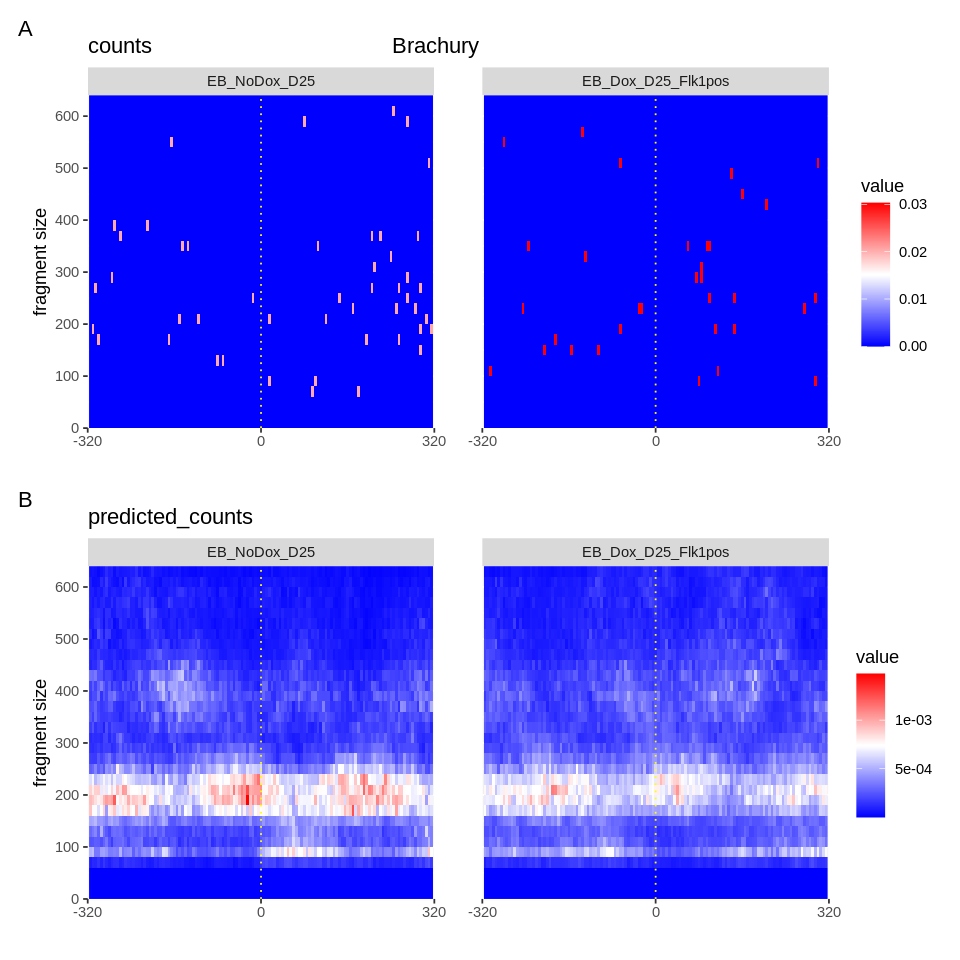

In [ ]:
options(repr.plot.width = 8, repr.plot.height = 8)
p1 / p2  + plot_annotation(tag_levels = 'A')

#Mycn

In [ ]:
anno_res[!is.na(anno_res$SYMBOL) & 
  anno_res$SYMBOL == 'Mycn' &
  anno_res$padj < 0.05 &
  anno_res$log_ratio > 0.1]

GRanges object with 1 range and 21 metadata columns:
      seqnames            ranges strand |    pvalue_z        padj
         <Rle>         <IRanges>  <Rle> |   <numeric>   <numeric>
  [1]    chr12 12927323-12927962      * | 9.20042e-13 2.07939e-08
      nucleosome_treatment nucleosome_control log_ratio     macs2    seatac
                 <numeric>          <numeric> <numeric> <numeric> <numeric>
  [1]             0.776677           0.590343  0.274321         0   7.68206
      difference          eb        annotation   geneChr geneStart   geneEnd
       <numeric> <character>       <character> <integer> <integer> <integer>
  [1] 0.00795449        TRUE Distal Intergenic        12  12936096  12940616
      geneLength geneStrand      geneId         transcriptId distanceToTSS
       <integer>  <integer> <character>          <character>     <numeric>
  [1]       4521          2       18109 ENSMUST00000130990.1         12654
                 ENSEMBL      SYMBOL               GENENAME
     

In [ ]:
mycn <- !is.na(anno_res$SYMBOL) & 
  anno_res$SYMBOL == 'Mycn' &
  anno_res$padj < 0.05 &
  anno_res$log_ratio > 0.1

In [ ]:
x2 <- model %>% predict(x[mycn], batch_size = ARGS[['vae_batch_size']], vplots = TRUE)
p1 <- vplot(x2, 'counts', ncol = 2L) +ggtitle('counts                                        Mycn') 
p2 <- vplot(x2, 'predicted_counts', ncol = 2L)

Warning message:
“Removed 64 rows containing missing values (geom_raster).”
Warning message:
“Removed 64 rows containing missing values (geom_raster).”


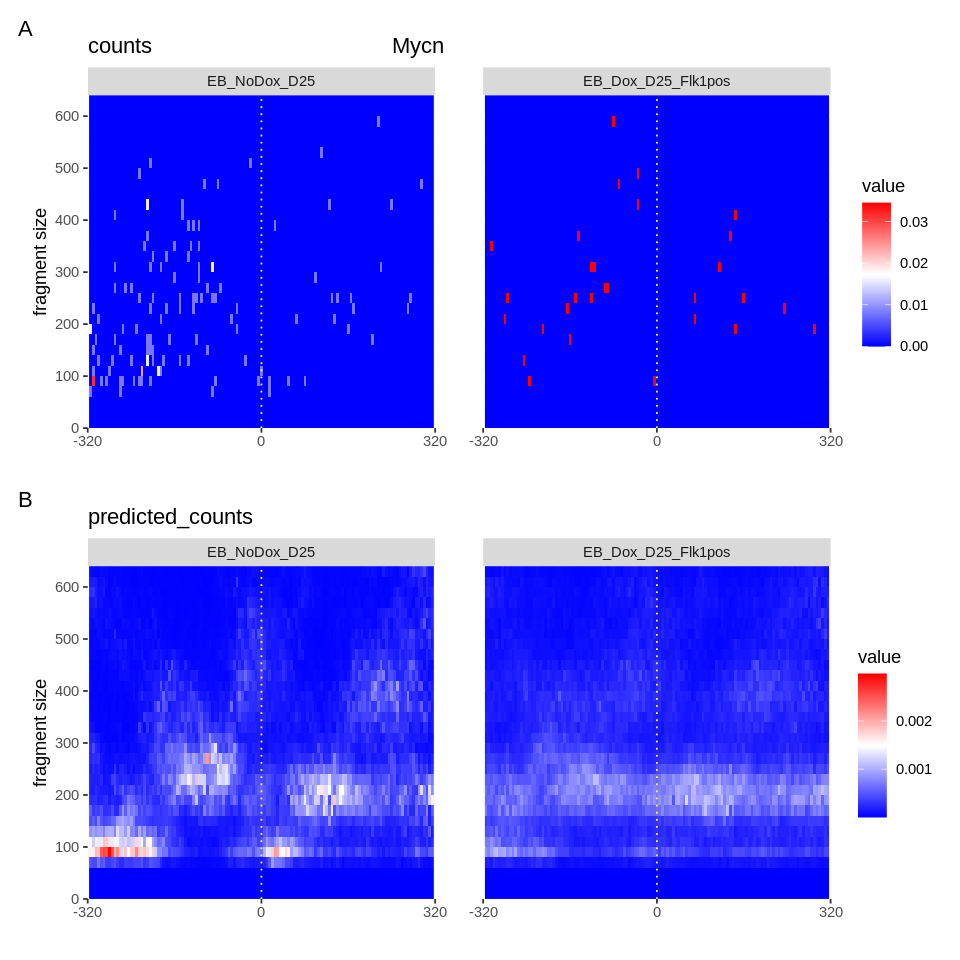

In [ ]:
options(repr.plot.width = 8, repr.plot.height = 8)
p1 / p2  + plot_annotation(tag_levels = 'A')

## SessionInfo

In [ ]:
sessionInfo()

R version 4.1.2 (2021-11-01)
Platform: x86_64-pc-linux-gnu (64-bit)
Running under: Ubuntu 18.04.5 LTS

Matrix products: default
BLAS:   /usr/lib/x86_64-linux-gnu/openblas/libblas.so.3
LAPACK: /usr/lib/x86_64-linux-gnu/libopenblasp-r0.2.20.so

locale:
 [1] LC_CTYPE=en_US.UTF-8       LC_NUMERIC=C              
 [3] LC_TIME=en_US.UTF-8        LC_COLLATE=en_US.UTF-8    
 [5] LC_MONETARY=en_US.UTF-8    LC_MESSAGES=en_US.UTF-8   
 [7] LC_PAPER=en_US.UTF-8       LC_NAME=C                 
 [9] LC_ADDRESS=C               LC_TELEPHONE=C            
[11] LC_MEASUREMENT=en_US.UTF-8 LC_IDENTIFICATION=C       

attached base packages:
[1] grid      stats4    stats     graphics  grDevices utils     datasets 
[8] methods   base     

other attached packages:
 [1] patchwork_1.1.1                    ggplot2_3.3.5                     
 [3] VennDiagram_1.7.1                  futile.logger_1.4.3               
 [5] igraph_1.2.11                      chromVARmotifs_0.2.0              
 [7] motifmatchr_1.16

In [ ]:
Sys.time() - start_time

Time difference of 49.17502 mins

In [ ]:
dsouz072/projects/seatac_project/config/seatac_MEF_Etv2/Flk1pos_up_MEF_regions.rds
dsouz072/projects/seatac_project/config/seatac_MEF_Etv2/Flk1pos_down_MEF_regions.rds
dsouz072/projects/seatac_project/config/seatac_EB_Etv2/Flk1pos_down_EB_regions.rds
dsouz072/projects/seatac_project/config/seatac_EB_Etv2/Flk1pos_Up_EB_regions.rds
